In [19]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [20]:
df = pd.read_csv("student.csv")

In [21]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9
395,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6


In [22]:
df = df.drop(columns=['romantic','famrel','Dalc','Walc'])
print(df.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  nursery higher  internet  freetime  goout health absences  G1  G2  G3  
0     yes    yes        no         3      4      3        6   5   6   6  
1      no    yes       yes         3      3      3        4   5   5   6  
2     yes    yes       yes         3      2      3       10   7   8  10  
3     yes    yes       yes         2      2      5        2  15  14  15  
4     yes    yes        no         3      2      5        4   6  10  10  

[5 rows x 29 columns]


In [23]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,freetime,goout,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,yes,no,3,4,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,yes,yes,3,3,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,yes,3,2,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,2,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,yes,no,3,2,5,4,6,10,10


In [24]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
freetime      0
goout         0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      397 non-null    object
 1   sex         397 non-null    object
 2   age         397 non-null    int64 
 3   address     397 non-null    object
 4   famsize     397 non-null    object
 5   Pstatus     397 non-null    object
 6   Medu        397 non-null    int64 
 7   Fedu        397 non-null    int64 
 8   Mjob        397 non-null    object
 9   Fjob        397 non-null    object
 10  reason      397 non-null    object
 11  guardian    397 non-null    object
 12  traveltime  397 non-null    int64 
 13  studytime   397 non-null    int64 
 14  failures    397 non-null    int64 
 15  schoolsup   397 non-null    object
 16  famsup      397 non-null    object
 17  paid        397 non-null    object
 18  activities  397 non-null    object
 19  nursery     397 non-null    object
 20  higher    

In [37]:
for col in df.select_dtypes('object').columns:
    df[col] = df[col].astype('int').cat.codes


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      397 non-null    int8 
 1   sex         397 non-null    int8 
 2   age         397 non-null    int64
 3   address     397 non-null    int8 
 4   famsize     397 non-null    int8 
 5   Pstatus     397 non-null    int8 
 6   Medu        397 non-null    int64
 7   Fedu        397 non-null    int64
 8   Mjob        397 non-null    int8 
 9   Fjob        397 non-null    int8 
 10  reason      397 non-null    int8 
 11  guardian    397 non-null    int8 
 12  traveltime  397 non-null    int64
 13  studytime   397 non-null    int64
 14  failures    397 non-null    int64
 15  schoolsup   397 non-null    int8 
 16  famsup      397 non-null    int8 
 17  paid        397 non-null    int8 
 18  activities  397 non-null    int8 
 19  nursery     397 non-null    int8 
 20  higher      397 non-null    int8

In [43]:
X = df.drop(columns=['G3'])
y = df['G3']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [45]:

# Check shapes
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

X_train: (317, 28)
y_train: (317,)


In [47]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)

In [51]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [52]:
print(f"mse:{mse}")

mse:3.2825760146088543


In [53]:
print(f"R-squared: {r2}")

R-squared: 0.8370614147167436


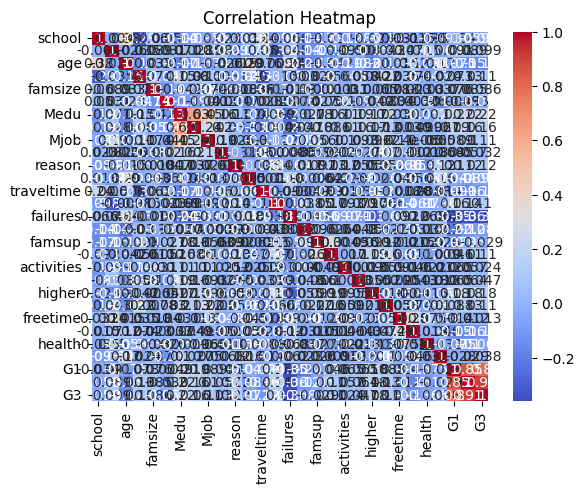

In [54]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

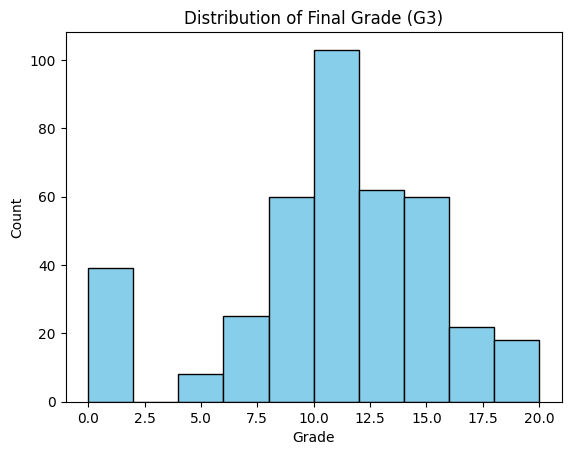

In [55]:
plt.hist(df['G3'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Final Grade (G3)")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

In [59]:
df = pd.get_dummies(df,drop_first=True)#convert into numerical

In [60]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,freetime,goout,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,1,1,0,3,4,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,0,1,1,3,3,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,1,3,2,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,2,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,1,0,3,2,5,4,6,10,10


In [61]:

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
# ==============================
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01)
}

In [63]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"\n{name}")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))


Linear Regression
MSE: 3.2825760146088654
MAE: 1.196433908356798
R2 Score: 0.837061414716743

Ridge Regression
MSE: 3.275016815909234
MAE: 1.1922334744166765
R2 Score: 0.8374366337936239

Lasso Regression
MSE: 3.227017379397752
MAE: 1.1689471883156284
R2 Score: 0.8398192017051568


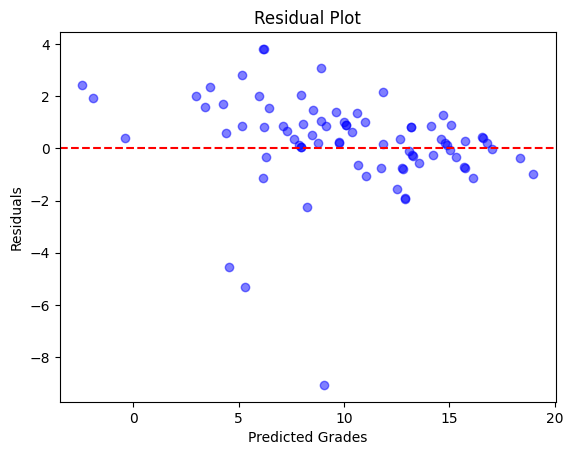

In [64]:
final_model = LinearRegression()
final_model.fit(X_train_scaled, y_train)
y_pred_final = final_model.predict(X_test_scaled)

residuals = y_test - y_pred_final

plt.scatter(y_pred_final, residuals, color="blue", alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Grades")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

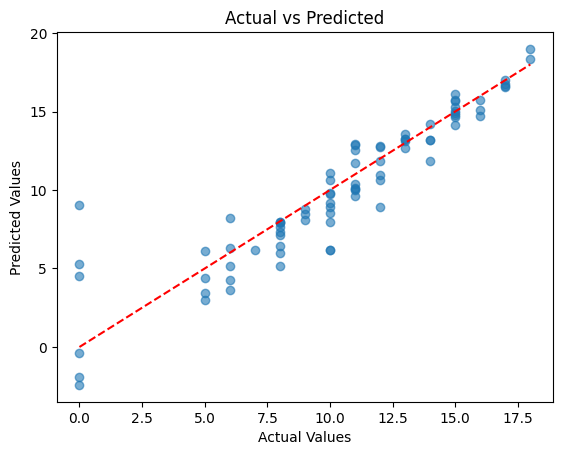

In [76]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.show()

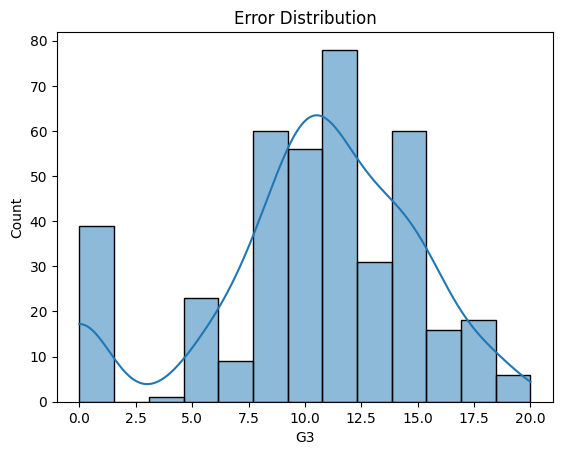

In [78]:
sns.histplot(df['G3'], kde=True)
plt.title("Error Distribution")
plt.show()

<Axes: ylabel='G3'>

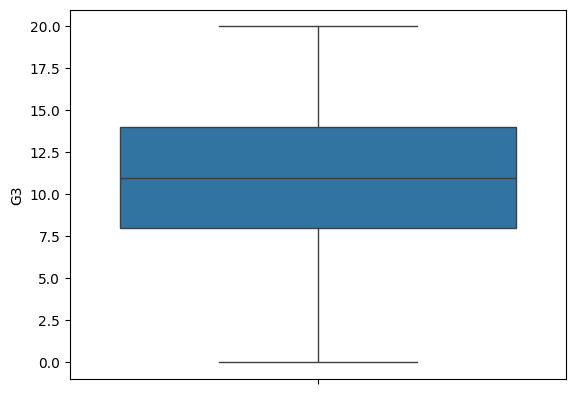

In [79]:
sns.boxplot(df["G3"])